<a href="https://colab.research.google.com/github/33MarGomez/Interactive-Tutorials/blob/main/demo_Inorg_1_Halides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installations

Run these cells below to start up Psi4. They're broken into seperate cells for a reason, as the first cell will cause the kernel to restart. The rest of them don't work if you put them in a single code block for some reason. You might notice we have to run a Linux instance for Psi4 to work right now, it's inelegant but not unusual. Rest assured many talented people are working on Psi4 installations at all times so it'll break sometimes, and Google will break imports too.

If this installation doesn't work, google 'Psi4' + 'install' or 'installation' and someone's working import code will pop up if you steal the top couple of lines.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

In [ ]:
import subprocess
import sys
subprocess.run("!mamba install -c anaconda intel-openmp", shell=True)
subprocess.run("conda config --add channels http://conda.anaconda.org/psi4", shell=True)
subprocess.run("mamba install psi4 resp -c conda-forge/label/libint_dev -c conda-forge", shell=True)

import os
import psi4

In [ ]:
subprocess.run("conda install dftd3-python -c conda-forge", shell=True)
subprocess.run("conda install gcp-correction -c conda-forge", shell=True)
subprocess.run("conda update -n base -c conda-forge conda", shell=True)
subprocess.run("pip install --upgrade pytest-dependency", shell=True)
subprocess.run("pip install --upgrade pluggy", shell=True)

CompletedProcess(args='pip install --upgrade pluggy', returncode=0)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

#🪢 Introduction & Basis Set

The central question we are going to answer in this series of simulations is why Osmium (III) will form a chloride and an iodide, but not a bromide. Several of these neutral halides will be described quantitatively while simulating their charged complexes, to avoid using more specialized simulation techniques for solids - which are still in beta deployments in Psi4.

As a comprimise, because we can't simulate that missing bromide species directly, the penultimate simulation will be undue Jahn-Teller distortions on $(T_{3g})^2$ Os occupancies in the fluoride. Recall that $T_{3g}$ distortion is very much less important than distortions in the $e_g$ set, this geometry is unusual. The compound is volatile, neutral, and stable, so we can simulate it. It takes 8 minutes to simulate, so scroll to the bottom and click run while you read through this lesson.

The final bit of science to discuss before a brief tech talk is the choice of basis set and method. Coupled clusters, where an arithmetic approximation breaks up long-short interactions in an organized excitation series, is standard for transition metal complexes. We're not going to do that. To balance the regularity of the orbitals, and using the First Hohenberg-Kohn theorem, we'll force more traditional covalency orbital overlaps to explain electronic effects. Because the lowest energy wavefunction functional is unique, some ugly, contorted, orbitals occur at non-frontier orbitals. Few geometry optimizations will be undertaken, well-known bond lengths are going to be used and if not, the universal force-field (UFF) molecular field will aid desired symmetries and angles where constructed by hand. The ability to constrain bond lengths and set symmetry tolerance in most viewer software mean that subjective transition metal constants and bond-strength balances are irrelevant issues to a 1-click angle precision check.

Navigate to https://www.iqmol.org/ and download their software.

The only tab you'll need here is to generate orbitals at will. You need a mouse if you participate in the build-alongs since a track-pad right click is insufficient to translate the view. The hand rotates, the wand gives you numbers at the bottom left of the view. If you must File > Save As, use .mol to save what you're looking at and .xyz to export coordinates. IQMol opens .fchk to generate MO's, which are the files generated by most languages to visualize.


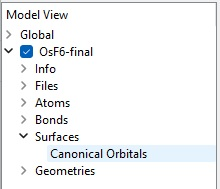

# 🥧 Exploring $\pi$ donor connections with $Ta_2OF_{10}$

Alkoxide bonding motifs are accessed by metals routinely, sometimes even through acid base activity linking centres together in clusters. The vanadates are well-studied examples. Despite this, $Ta_2OF_{10}$ has a completely linear $μ-O$ bridge suggesting multiple bonding character between completely oxidized metal centres. Somehow, instead of the tetrahedral lone-pair oxygen geometries often associated with ethers, accessing the fluoride density across Ta places oxygen in a more electron-rich environment. The halide must be acting as a $\pi$-donor to oxygen, and stranger still, it's the most electronegative element on the table with only 1-2 pm differences every bond.

Run that cell below.

In [ ]:
print('This code should take minutes about 24 minutes')
mol = psi4.geometry("""
0 1
O 0.0 0.0 0.0
Ta 1.88 0.0 0.0
Ta -1.88 0.0 0.0
F 3.77 0.0 0.0
F -3.77 0.0 0.0
F 1.88 1.90 0.0
F 1.88 -1.90 0.0
F 1.88 0.0 1.90
F 1.88 0.0 -1.90
F -1.88 1.90 0.0
F -1.88 -1.90 0.0
F -1.88 0.0 1.90
F -1.88 0.0 -1.90

units angstrom
symmetry c1
"""
)
psi4.set_options({'reference': 'uks',
                      "maxiter": 200,
                      'optking__geom_maxiter': 500,
                      'opt_type': 'MIN',
                  'E_convergence' : 1e-03,
                  'd_convergence' : 1e-03,
                  'fail_on_maxiter': False
                     })
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
print(d_energy)
psi4.fchk(d_wfn,'Ta2OF10.fchk')

Our simulation verifies $\pi$ share across oxygen. Generate orbitals to 90% confidence intervals. The HOMO is equatorial fluorines contributing to f-orbitals on Ta to create zero-overlap contributions throughout the F-Ta-O-Ta-F row of atoms. The LUMO is seen to occur as discrete Ta-O-Ta bonding with side-on f-orbital bonding that uses all but axial fluorines to support its density. You might also notice that the LUMO rehybridizes one set of fluorines to no longer participate in the LGO, the very inequivalence we are predicting to cause $OsF_6$ to have one set of long, two short type bonds. It is attempting to stabilize itself around keeping electrons around itself by not participating in the system, and creating a single solution that resembles a transition state less readily.

In chemistry, the degree by which an orbital is antibonding is *assumed* to be higher than the degree by which it is bonding. However, what we're seeing is that the mass of the nucleus stabilizes $T_{1u}$ so much that $T_{2g}^{*}$ can be occupied by the other 6 of 12 fluorine electrons (the other 6 form $T_{2g}$ $\pi$-donation). That's on display here, the HOMO has a zero overlap interaction while the LUMO specifically excludes the axial fluorine bonds in $\pi^{*}$. The energy gap to the next set of orbitals is also unduely steep for what should be a three-fold degenerate LGO, reflective of sharing across the molecule.

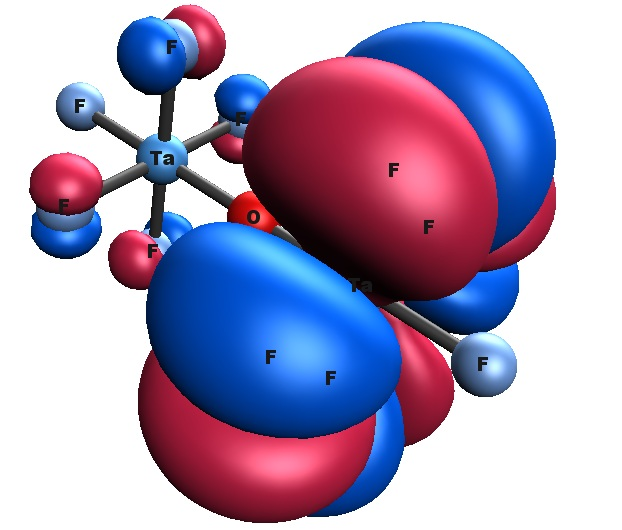

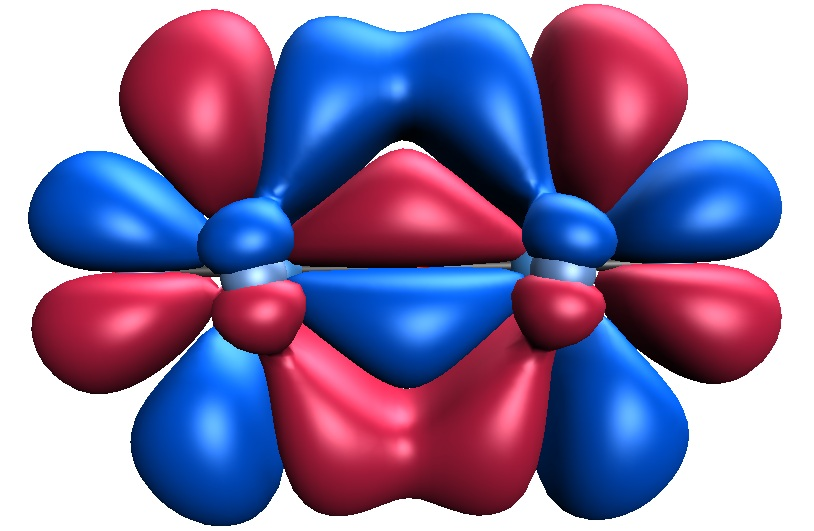

#⚖ Halides establish energy scales
Green's Covalent Bonding Classification model is used in organometallics to assess the factors keeping a complex together in a neutral model. The use of GGA without coupled cluster ligand treatment (one unique molecule overlap treatment versus correlated ions) is most permissible by this counting scheme - though it's typically most useful for first rows if departing from organometallic descriptions.

The description is simple: if a metal has few electrons added to it and is low oxidation state, there's a bulky ligand involved. If it is low oxidation state and has lots of electrons around it, there's a pi-acceptor (and this is always emphasized in inorganics courses!). If the metal centre is very oxidized with not many electrons around it, there are strong $\sigma$ or $\pi$ donors. If it is highly oxidized and has a lot of electrons around it, it was caused by several small ligands. Your typical $\sigma$ donor ligands, which represented the first species you interacted with learning complexation models, are the middle ground between the four regions. There are finer features, like that bulky ligands are an elipse representing the trade-off between oxidation and valence count, or that some regions start half-way through an oxidation or valence number. We'll come across these examples naturally. Only the first row metals will conform to these descriptions, as the Lanthanoid contraction and heavy nucleus effects will cause strange things to happen - like that Hf and Zr high oxidation states will access 8 coordinate geometries and Y regularly up to 9, all to stabilize a different heteroatom's state in solution. At that point, it becomes easier to approach the problem by assuming electrons like tunnelling the shielding but are still fickle to density.

Low Spin / High spin matters between Fe and Co and Spectrochemical series should be used for $H_2O$ and $NH_3$ in Fe(III) and only the Co(III) fluoride is high-spin. Co(II) specifically does not matter - that's what makes Cobalt so special - its $d^7$ occupancy is the first worst state for high or low-spin distinction. Refer to the spectral series between those metals but after Co, everything is low-spin based on the oxidation counts required to strip $e_g$ to a count where it matters. In the second and third rows, the Lanthanide contraction means the metals do not significantly change radius. This is caused by poor shielding by f-orbitals, but the metals do not become identical, that nucleus is still very heavy. The s and p orbital sensitivity is higher than d, causing their energies to start to converge, causing $T_{1u}$ stabilities. Those are the best arguments for confining Covalent Bonding Classification to the first row metals - steric hinderance cannot be used between second and third row to argue complex stabilities.

Fluorides are formed between hard atoms and so will form at high oxidation states exclusively for some species. This starts at Group VI in both rows. Chlorides are similar but have $X(aq)$ hydration product enthalpies comparable to the gas-phase stripping $X^-(g)$ from $H^+(g)$ of its electron, so will be readily comparable to the advantage of removing halide from solution. To restate this point, moving the electron forming $X^{-}(g)$ from $H(g)$ + $X(g)$ is as favourable as forming $X^{-}(aq)$ from $X^{-}(g)$ starting at Chloride. Bromide is an intermediate hardness ligand and iodine is soft. No species that forms a neutral atom lattice (non-cluster) iodide fails to form a bromide except our focal $OsF_3$ species and Fe(I). Many low-oxidation state metals will form discrete clusters without halide discrimination, so some element of symmetry does become important in these discussions. This is important to Fe, which has a pressure condition on a synthesis from the elements to a bridged iodide species. Elemental iodine has intralayer bond distances in its solid longer than its diatomic gas, so electron dispersion is important to it and can be stabilized by Fe(I) *in vacuuo*. Thinking back on our thermodynamics knowledge, this means the complex is as stable as degrees of motion in the iodide gas - a great calibrant for the orbital energies using $RT$.

In the third row, of note to this point, are Mo and W because the hard/soft limits happen in adjacent oxidation states. In Mo, no iodides form after $MoI_3$, no bromides after $MoBr_4$, no chlorides after $MoCl_5$. $MoF_6$ exists. High oxidation states are stable in the second and third rows, but more so for the third. Therefore, fluorides, chlorides and bromides exist for M(IV) but no $WF_3$. W(III) are also exclusively $M_6$ clusters, so even in the ability to access other centres' density, W(III) half-occupancy is unable to support $F^-$. We know it is not caused by electronegativity because the clusters exist use bridging halogen bonds, so it must be half-$\pi^*$ occupancy doing this. W(II) halides are well established, otherwise in extended structures. This is because $\beta$ spin inequivalency causes systematic depletion of sites, and restrictions on the extent of nucleophilic attack. Appropriately, they are difficult to oxidize into mixed oxidation states. Lanthanide contraction causes this to exclusively address oxidation-state stability. This doubly compares the heavy metal tendency to form multiple metal-metal bonds at early oxidation states, covered in our next lesson. Finally, we'd be remissed not to bring up the hexafluoride oxidation strength series:

$PtF_6>IrF_6>OsF_6>ReF_6>WF_6$

Third and second-row oxidation stability can be compared to softness by Group VI halide ion colorimetry. Both $MoF_5$ and $WF_5$ are yellow, as a control species, created by hardness as evidenced by violet light absorbance. $MoCl_5$ and $WCl_5$ are black and dark green respectively because Mo is starting to be unstable at this state and forming kinetic products whereas W is stable at this oxidation state. Thus, its absorption can be used to check the spread of states, as dark green so scattered is likely to be related in some way to the color of chlorine gas. The lattice is taking on some bonding scheme that is *complementary* to chlorine gas, exactly not the same. It is probably avoiding mixing $\Psi_{cov}$ and $\Psi_{ionic}$ to take whatever exposes the centre to the most electrons. Ta(IV) also does not form a fluoride but Nb(IV) does, both $TaF_5$ and $TaF_3$ exist, because Ta(I) is of intermediate stability to harder or stabler states. This latter point may not seem obvious, but reflected in its CSFE is that $d^2$ is stabilizing, and using our previous logic, this is reflective of transfering density in more than one dimension. Ammending the two systems, $ReF_6$ and $ReF_7$ are yellow-scattering biased-violet, $ReF_4$ blue-scattering biased-orange, $ReCl_4$ is black but $TcCl_4$ is instead red-scattering biased-green absorption. This reflects the more halide-like bonding motif at the less oxidized species. The Re(III) species are clusters containing double bonds to again make metals inequivalent but with a different strategy: $ℓ$.

The first row requires Vanadium and Titanium for establishing relationships between CSFE and hardness. Luckily, as is discussed in the next section, there are ways of spectroscopically measuring orbital energies using aqueous $Ti^{2+}$ cations. Vanadium has no fluorides beyond $VF_5$, chlorides beyond $VCl_4$, but exhibits both $VCl_3$ and $VI_3$. Ti(II) exhibits all halides except $TiF_2$.

# 🎓 Where are metallic halides used in models?
The importance of studying halide series is most readily demonstrated by historical mistakes of II/IV Pd and Pt mixed state polymers. They stabilize about stable CFSE $d^8$ and $d^{10}$ by mixing square planar and octahedral geometries but were mistaken for (III) states. It would have been trivially easy to argue the kinetically unstable $d^7$ would be impossible to isolate in a thermodynamic product with a consistent geometry. That makes it easier to argue that the bonding scheme was halide-centric, and that the structure was irregular - as opposed to difficult to deconvolute and hiding its true structure - as non-stoichiometric mistakes added up and the discrete domains hid. It's worse that both metals' salts are red, the color complementary to green, suggesting the complex would scatter all but the natural colours of chlorine and fluorine gas.

However, now we know that there's two metallic environments and that the halide is seeing more, not less, electron density by exchanging across the centre. It would have been difficult to predict a systematic symmetry break between square planar and octahedral geometries creating the same outcome as a range of dimer states. In fact, you might find the existence of any metal halide at all distressing. It implies a diatomic halide wavefunction that exposes each nuclear centre to less electron density than symmetrically accessing larger numbers of halides in the early row metals. More pointedly, late row species above group 9 relativistically contract their shells, causing these centres to see more density. Thus, the time independent Schrodinger model eventually fails and a quantum computer must eventually exist.

Another advantage to studying halides is the pH-sensitive V(V) ion, which loses protons to become several extended polymer structures that might be difficult to distribute along a measurement in light of error. Instead of getting the measurement right, isoelectronic $[Ti(OH_2)_6]^{2+}$ can be measured with two bands at 430 nm and 650 nm matching the dirtier (as in brown) $[V(OH_2)_6]^{3+}$ spectrum. The aquated Ti species results from precipitation of totally stripped $Ba[TiF_6]$ or $Ca[TiF_6]$, so is a spectroscopic analogue without interference of metallic-centred electron density. But you need to know to precipitate those halides first. A more popular example of this spectroscopic principle is $[MnO_4]^{1-}$ non-bonding and metal-centric promotion making a royal purple.

#$OsF_6$
We'll demonstrate the typical theoretical chemistry workflow by extracting its bond distances ourselves. Using a two-iteration energy simulation, we'll attempt to pick the lowest energy species based on adding densities together at each point (based on the SAD guess structure) [1].

The $[OsO_4]^{2-}$ bond distances when forming a Lewis base adduct are 171 pm. The $RuF_5$ distances ranging between 184 pm and 192 pm, should also be captured in our estimates because of the La-contraction, though its bond distance ranges result from a weakly associated dimer. For this reason, we're thinking it'll probably exhibit distances closer to the middle range of the Ru distances towards the Osmate, and we'll want to capture an even amount of points in case we get lucky enough to see the two distances as intermediates on an energy surface plot. We'll pick six points, avoiding intellectualizing too much, because it's the lowest number that capable of breaking an odd number of ties. Between the long 194 pm distance and the middle number, we'll take a conservative two points. Based on the energies of the results, we'll add shorter distances of 130 pm to 150 pm to check if there are lower achievable energies. The SAD Guess structure essentially adds up probability at each point then reduces over the number of atoms, so it will introduce a wrongfully stable low-distance energy [1].

Run our preliminary Potential Energy graphing simulations below

*[1]. Lehtola, S. Assessment of Initial Guesses for Self-Consistent Field Calculations. Superposition of Atomic Potentials: Simple yet Efficient. *J. Chem. Theory Comput.* **2019**, *15*, 1593–1604. DOI: 10.1021/acs.jctc.8b01089.



In [ ]:
print('This code takes less than 5 minutes. It depicts scouting runs of potential energies')
import matplotlib.pyplot as plt

distances = [1.71, 1.84, 1.92, 1.6, 1.5, 1.3, 1.4]
energies = []

psi4.set_options({'reference': 'uks',
                  "maxiter": 2,
                  'optking__geom_maxiter': 500,
                  'fail_on_maxiter': False
                     })

ringer = (184 - 172)/6
multiples = range(1,6)
for g in multiples:
  g = float(g)
  que = g * ringer + 172
  que = que / 100
  distances.append(que)
ringer = (192 - 184) / 4
multiples = [2, 3]
for g in multiples:
  g = float(g)
  que = g * ringer + 184
  que = que / 100
  distances.append(que)

for i in distances:
  given = i
  n_given = -1 * i
  mol = psi4.geometry("""
  0 3
  Os 0.0 0.0 0.0
  F {0} 0.0 0.0
  F {1} 0.0 0.0
  F 0.0 {0} 0.0
  F 0.0 {1} 0.0
  F 0.0 0.0 {0}
  F 0.0 0.0 {1}

  units angstrom
  symmetry c1
  """.format(given,n_given)
  )
  d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  energies.append(d_energy)

plt.plot(distances,energies,'bo')
energyextractor = []
energyextractor.append(energies[0])
energyextractor.append(energies[2])
plt.plot([1.71,1.92],energyextractor,'r--')
energyextractor = []
energyextractor.append(energies[6])
energyextractor.append(energies[2])
plt.plot([1.4,1.92],energyextractor, 'g--')

The 150 pm energy rise slightly too steep to be part of the seeming metastability between 140 and 192 pm. We'll confirm that by running a 10 iteration simulation constructing orbitals in a more refined manner, and it is so revealed that they are closer in energy to 184 pm distances. The concavity in the distances is usually indicitve of metastability, like in thermodynamics phase diagrams. This means the energy was climbing less than expected at 184 pm and the extent to which SAD was capturing only coincident overlap with 150 pm means that we should be okay to proceed with 184 pm. We see that this is in fact the case, 1 hartree is 2625 kJ/mol, so the added stability of picking that number is significant.

In [ ]:
print('This code takes less than 7 minutes')
distances=[1.5,1.72,1.84]

psi4.set_options({'reference': 'uks',
                      "maxiter": 20,
                      'optking__geom_maxiter': 500,
                      'opt_type': 'MIN',
                  'fail_on_maxiter': False
                     })
for i in distances:
  given = i
  n_given = -1 * i
  mol = psi4.geometry("""
  0 3
  Os 0.0 0.0 0.0
  F {0} 0.0 0.0
  F {1} 0.0 0.0
  F 0.0 {0} 0.0
  F 0.0 {1} 0.0
  F 0.0 0.0 {0}
  F 0.0 0.0 {1}

  units angstrom
  symmetry c1
  """.format(given,n_given)
  )
  d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  print('The ' + str(given) + ' angstrom energy is ' + str(d_energy) + ' hartree.')

distances=[1.81,1.82, 1.83]

psi4.set_options({'reference': 'uks',
                      "maxiter": 20,
                      'optking__geom_maxiter': 500,
                      'opt_type': 'MIN',
                  'fail_on_maxiter': False
                     })
for i in distances:
  given = i
  n_given = -1 * i
  mol = psi4.geometry("""
  0 3
  Os 0.0 0.0 0.0
  F {0} 0.0 0.0
  F {1} 0.0 0.0
  F 0.0 {0} 0.0
  F 0.0 {1} 0.0
  F 0.0 0.0 -1.84
  F 0.0 0.0 1.84

  units angstrom
  symmetry c1
  """.format(given,n_given)
  )
  d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  print('The ' + str(given) + ' angstrom / 1.84 angstrom energy is ' + str(d_energy) + ' hartree')

Finally, we do know that equatorial bonds are shorter than axial bonds, and that in the Ta species, this happened between one and two pm. It so happens that 184 pm this is the extreme end of the Ru bonds, but not of Os bonds relative to Os(VIII) oxides. The energies suggest that between 182 pm / 184 pm is the final set of distances. The above cell already solves the debate as an appended piece of code at the end reveals that there's a balance struck between disrupting $\pi$ character and leaving the ligands energetically equivalent. We can start concluding, early on, that this is probably a ligand equivalence effect with the most stable species resulting from intentionally breaking LGO density from $\pi^{*}$ contributions.

The flagship simulation is below

In [ ]:
print('This code should take less than 8 minutes')
mol = psi4.geometry("""
0 3
Os 0.0 0.0 0.0
F 1.82 0.0 0.0
F -1.82 0.0 0.0
F 0.0 1.82 0.0
F 0.0 -1.82 0.0
F 0.0 0.0 -1.84
F 0.0 0.0 1.84

units angstrom
symmetry c1
"""
)
psi4.set_options({'reference': 'uks',
                      "maxiter": 500,
                      'optking__geom_maxiter': 500,
                      'opt_type': 'MIN',
                  'E_convergence' : 1e-05,
                  'd_convergence' : 1e-03,
                  'fail_on_maxiter': False
                     })
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
print(d_energy)
psi4.fchk(d_wfn,'OsF6.fchk')

We see that we are correct, particularly using the LUMO of the more occupied alpha channel. Its antibonding contribution specifically creates non-bonding interactions with one of the fluorine axis but antibonding interactions with every other fluorine. Exactly as predicted, the two Os electrons establish a closer non-bonding $T_{2g}$ d-orbital. The other set, seemingly without barrier to the $\pi$ and $\pi^{*}$ stability, instead extends its bond length and establishes a non-bonding to preserve the stability of the compound. Only one orientation of this triply degenerate orbital set will be shown. In the less occupied Beta channel, a doubly degenerate orbital set antibonds and bonds preferentially to a row of fluorine atoms.

There is an $[OsBr_6]^{3-}$ but as has been demonstrated, simulating this species would not have been informative as the number of electrons added counteracted the interesting $\pi$-donor effect - all three metal d-orbital orientations are occupied. The reason $OsBr_3$ is so mysterious is that it cannot be a hardness/oxidation state disagreement if the iodide and chloride both form but the intermediate hardness Br cannot. The result can only be quantum mechanical.

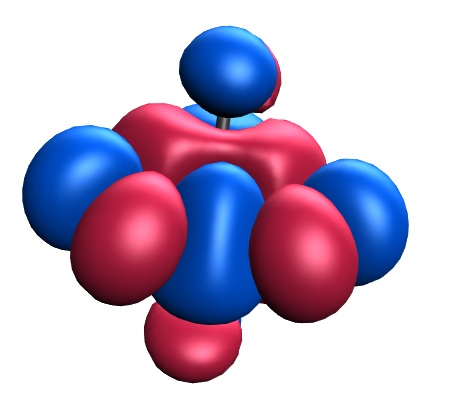

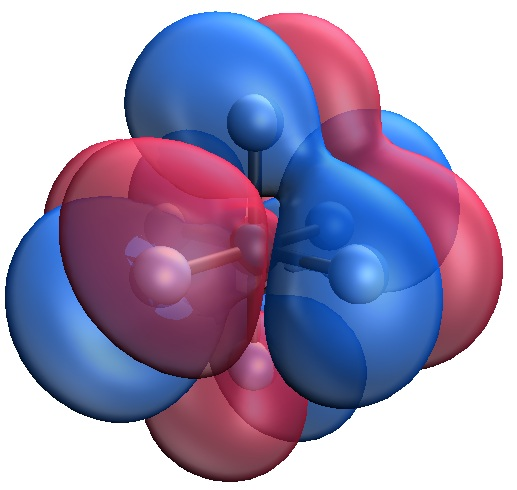

# 🌍 Real World Connections

Chromate, $[CrO_4]^{2-}$ is often detected in an anionic mode with UV-Vis, but not because of its vibrant yellow color. Instead, a post-column derivization with oxygen lone-pairs encourages it to elute as a colorful complex that doesn't block the column with acid-base precipitate. Diphenyl Carbazide (DPC) is the chosen chromophore for the group VI ions, which are detected as anions (as opposed to the default cationic form metals are used to!) [2][3]. Clearly, this anion stability must be caused by their ability to satiate oxygen electron requirements.

[2]. Rangan, S. M.; Krajmalnik-Brown, R.; Delgado, A. G. An Ion Chromatography Method for Simultaneous Quantification of Chromate, Arsenate, Selenate, Perchlorate, and Other Inorganic Anions in Environmental Media. *Environ. Eng. Sci.* **2021**, *38* (7), 627–634. DOI: 10.1089/ees.2020.0347.

[3]. Dionex Corporation. IonPac AS7 Anion-Exchange Column. (LPN 0843-02). Sunnyvale, CA.